## ViTの実装

## 1. import the necessary libraries

In [1]:
#### 1. import the necessary libraries
import torch
import torch.nn as nn
from vit import ViT
import matplotlib.pyplot as plt
from train import train
from torchsummary import summary

## 2. Train the model

### 2.1. Check the device

In [2]:
if torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

### 2.2. Load the dataset

In [3]:
from dataloader import get_dataloader
batch_size = 128
train_dataloader, val_dataloader, test_dataloader = get_dataloader(batch_size = batch_size)
# Check the image size and batch size from the first batch of each dataloader
for name, dataloader in zip(['Train', 'Eval'], [train_dataloader, val_dataloader]):
    images, labels = next(iter(dataloader))
    ## image.shape = (batch_size, channel, img_size, img_size)
    print(f"{name} Dataloader - Batch size: {images.shape[0]}, Image size: {images.shape[2]}x{images.shape[3]}")
print("Classes:",train_dataloader.dataset.classes)

Files already downloaded and verified
Files already downloaded and verified
Train Dataloader - Batch size: 128, Image size: 32x32
Eval Dataloader - Batch size: 128, Image size: 32x32
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### 2.3. Define the model (ViT-4T)

In [4]:
## Data loaderでサイズは決まる
batch_size = images.shape[0]
in_channels = images.shape[1]
img_size = images.shape[2]
num_classes = len(train_dataloader.dataset.classes) ## Using CIFAR10
## Model options
patch_size = 16
embedding_dim = 192
num_heads = 3
num_encoder_layer = 12
hidden_dim = 192 * 4
dropout = 0.05
net = ViT(in_channels = in_channels,
            image_size = img_size,
            num_classes = num_classes,
            num_heads = num_heads,
            num_encoder_layer = num_encoder_layer,
            hidden_dim = hidden_dim,
            dropout = dropout)
summary(net, input_size=(in_channels, img_size, img_size))
x = torch.randn(batch_size, in_channels, img_size, img_size)
print("Input shape is ",x.shape)
pred = net(x)
print("Output shape is ",pred.shape)

ViT is implemented
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 384, 2, 2]         295,296
           Dropout-2               [-1, 5, 384]               0
   ViT_input_Layer-3               [-1, 5, 384]               0
         LayerNorm-4               [-1, 5, 384]             768
            Linear-5               [-1, 5, 384]         147,456
            Linear-6               [-1, 5, 384]         147,456
            Linear-7               [-1, 5, 384]         147,456
           Softmax-8              [-1, 3, 5, 5]               0
           Dropout-9              [-1, 3, 5, 5]               0
           Linear-10               [-1, 5, 384]         147,840
Self_Attention_Layer-11               [-1, 5, 384]               0
        LayerNorm-12               [-1, 5, 384]             768
           Linear-13               [-1, 5, 768]         295,680
             GELU

### 2.4. Define the optimizer and the loss function

In [5]:
optimizer = torch.optim.AdamW(net.parameters(),
                              lr=0.0005,
                              weight_decay=0.05
                              )
criterion = nn.CrossEntropyLoss()


### 2.5. Train the model

In [6]:
num_epochs = 300
train(net, train_dataloader, val_dataloader, test_dataloader, num_epochs, optimizer, criterion, device)

Device we use: mps
-------------
Epoch 1/300 starts


100%|██████████| 391/391 [01:14<00:00,  5.22it/s]


Epoch [1/300], Train loss: 749.3248783349991


100%|██████████| 79/79 [00:02<00:00, 26.43it/s]


Epoch [1/300], Val loss: 136.35238552093506
Epoch 1/300 Ends, Time: 77.9631519317627
-------------
Epoch 2/300 starts


100%|██████████| 391/391 [00:59<00:00,  6.53it/s]


Epoch [2/300], Train loss: 688.3053556680679


100%|██████████| 79/79 [00:02<00:00, 27.67it/s]


Epoch [2/300], Val loss: 130.13691663742065
Epoch 2/300 Ends, Time: 62.737663984298706
-------------
Epoch 3/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.63it/s]


Epoch [3/300], Train loss: 664.947462439537


100%|██████████| 79/79 [00:02<00:00, 27.84it/s]


Epoch [3/300], Val loss: 127.85861873626709
Epoch 3/300 Ends, Time: 61.775970697402954
-------------
Epoch 4/300 starts


100%|██████████| 391/391 [01:00<00:00,  6.48it/s]


Epoch [4/300], Train loss: 647.1603119373322


100%|██████████| 79/79 [00:02<00:00, 27.25it/s]


Epoch [4/300], Val loss: 126.20483243465424
Epoch 4/300 Ends, Time: 63.26706624031067
-------------
Epoch 5/300 starts


100%|██████████| 391/391 [01:00<00:00,  6.50it/s]


Epoch [5/300], Train loss: 636.3108111619949


100%|██████████| 79/79 [00:02<00:00, 27.64it/s]


Epoch [5/300], Val loss: 124.02852928638458
Epoch 5/300 Ends, Time: 63.044646978378296
-------------
Epoch 6/300 starts


100%|██████████| 391/391 [00:59<00:00,  6.57it/s]


Epoch [6/300], Train loss: 627.3014240264893


100%|██████████| 79/79 [00:02<00:00, 27.78it/s]


Epoch [6/300], Val loss: 121.52271509170532
Epoch 6/300 Ends, Time: 62.33309626579285
-------------
Epoch 7/300 starts


100%|██████████| 391/391 [00:59<00:00,  6.60it/s]


Epoch [7/300], Train loss: 624.8908079862595


100%|██████████| 79/79 [00:02<00:00, 26.64it/s]


Epoch [7/300], Val loss: 122.57400023937225
Epoch 7/300 Ends, Time: 62.183966875076294
-------------
Epoch 8/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.63it/s]


Epoch [8/300], Train loss: 622.1585432291031


100%|██████████| 79/79 [00:02<00:00, 27.97it/s]


Epoch [8/300], Val loss: 121.41253983974457
Epoch 8/300 Ends, Time: 61.76595115661621
-------------
Epoch 9/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.63it/s]


Epoch [9/300], Train loss: 615.4329866170883


100%|██████████| 79/79 [00:02<00:00, 27.90it/s]


Epoch [9/300], Val loss: 123.8039071559906
Epoch 9/300 Ends, Time: 61.77858591079712
-------------
Epoch 10/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.66it/s]


Epoch [10/300], Train loss: 612.7242008447647


100%|██████████| 79/79 [00:02<00:00, 27.98it/s]


Epoch [10/300], Val loss: 123.35582709312439
Epoch 10/300 Ends, Time: 61.49674391746521
-------------
Epoch 11/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.67it/s]


Epoch [11/300], Train loss: 621.4933540821075


100%|██████████| 79/79 [00:02<00:00, 27.50it/s]


Epoch [11/300], Val loss: 127.05001294612885
Epoch 11/300 Ends, Time: 61.52922296524048
-------------
Epoch 12/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.67it/s]


Epoch [12/300], Train loss: 615.771476149559


100%|██████████| 79/79 [00:02<00:00, 26.50it/s]


Epoch [12/300], Val loss: 124.11478400230408
Epoch 12/300 Ends, Time: 61.64771604537964
-------------
Epoch 13/300 starts


100%|██████████| 391/391 [01:01<00:00,  6.40it/s]


Epoch [13/300], Train loss: 603.6794677972794


100%|██████████| 79/79 [00:03<00:00, 25.92it/s]


Epoch [13/300], Val loss: 119.99732637405396
Epoch 13/300 Ends, Time: 64.18921422958374
-------------
Epoch 14/300 starts


100%|██████████| 391/391 [00:59<00:00,  6.55it/s]


Epoch [14/300], Train loss: 602.8455647230148


100%|██████████| 79/79 [00:03<00:00, 25.45it/s]


Epoch [14/300], Val loss: 120.84914803504944
Epoch 14/300 Ends, Time: 62.76603984832764
-------------
Epoch 15/300 starts


100%|██████████| 391/391 [00:59<00:00,  6.61it/s]


Epoch [15/300], Train loss: 598.1858370304108


100%|██████████| 79/79 [00:02<00:00, 27.00it/s]


Epoch [15/300], Val loss: 120.95217406749725
Epoch 15/300 Ends, Time: 62.11302876472473
-------------
Epoch 16/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.93it/s]


Epoch [16/300], Train loss: 591.3352950811386


100%|██████████| 79/79 [00:02<00:00, 30.29it/s]


Epoch [16/300], Val loss: 120.14438915252686
Epoch 16/300 Ends, Time: 59.0579137802124
-------------
Epoch 17/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.67it/s]


Epoch [17/300], Train loss: 588.8078806400299


100%|██████████| 79/79 [00:02<00:00, 27.68it/s]


Epoch [17/300], Val loss: 120.44617128372192
Epoch 17/300 Ends, Time: 61.478862047195435
-------------
Epoch 18/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.66it/s]


Epoch [18/300], Train loss: 592.2182658910751


100%|██████████| 79/79 [00:02<00:00, 28.25it/s]


Epoch [18/300], Val loss: 119.93128037452698
Epoch 18/300 Ends, Time: 61.52337694168091
-------------
Epoch 19/300 starts


100%|██████████| 391/391 [00:57<00:00,  6.78it/s]


Epoch [19/300], Train loss: 585.7607650756836


100%|██████████| 79/79 [00:02<00:00, 28.23it/s]


Epoch [19/300], Val loss: 121.16716015338898
Epoch 19/300 Ends, Time: 60.43362307548523
-------------
Epoch 20/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.95it/s]


Epoch [20/300], Train loss: 584.9514476060867


100%|██████████| 79/79 [00:02<00:00, 28.31it/s]


Epoch [20/300], Val loss: 121.00670182704926
Epoch 20/300 Ends, Time: 59.051323890686035
-------------
Epoch 21/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.91it/s]


Epoch [21/300], Train loss: 580.3884108066559


100%|██████████| 79/79 [00:02<00:00, 27.51it/s]


Epoch [21/300], Val loss: 120.5503602027893
Epoch 21/300 Ends, Time: 59.41948413848877
-------------
Epoch 22/300 starts


100%|██████████| 391/391 [00:54<00:00,  7.12it/s]


Epoch [22/300], Train loss: 578.953507900238


100%|██████████| 79/79 [00:02<00:00, 29.15it/s]


Epoch [22/300], Val loss: 117.47660160064697
Epoch 22/300 Ends, Time: 57.599183082580566
-------------
Epoch 23/300 starts


100%|██████████| 391/391 [00:54<00:00,  7.16it/s]


Epoch [23/300], Train loss: 577.7461673021317


100%|██████████| 79/79 [00:03<00:00, 26.04it/s]


Epoch [23/300], Val loss: 119.82724487781525
Epoch 23/300 Ends, Time: 57.64483118057251
-------------
Epoch 24/300 starts


100%|██████████| 391/391 [00:57<00:00,  6.84it/s]


Epoch [24/300], Train loss: 574.2764847278595


100%|██████████| 79/79 [00:02<00:00, 28.51it/s]


Epoch [24/300], Val loss: 118.2682535648346
Epoch 24/300 Ends, Time: 59.95587086677551
-------------
Epoch 25/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.01it/s]


Epoch [25/300], Train loss: 576.1871732473373


100%|██████████| 79/79 [00:02<00:00, 28.31it/s]


Epoch [25/300], Val loss: 120.24900579452515
Epoch 25/300 Ends, Time: 58.59899282455444
-------------
Epoch 26/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.03it/s]


Epoch [26/300], Train loss: 570.1541248559952


100%|██████████| 79/79 [00:02<00:00, 28.54it/s]


Epoch [26/300], Val loss: 119.12325739860535
Epoch 26/300 Ends, Time: 58.366795778274536
-------------
Epoch 27/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.87it/s]


Epoch [27/300], Train loss: 567.4490612745285


100%|██████████| 79/79 [00:02<00:00, 28.45it/s]


Epoch [27/300], Val loss: 116.70177519321442
Epoch 27/300 Ends, Time: 59.70286703109741
-------------
Epoch 28/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.04it/s]


Epoch [28/300], Train loss: 564.1840304136276


100%|██████████| 79/79 [00:02<00:00, 30.80it/s]


Epoch [28/300], Val loss: 119.10235834121704
Epoch 28/300 Ends, Time: 58.068294048309326
-------------
Epoch 29/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.38it/s]


Epoch [29/300], Train loss: 560.9121822118759


100%|██████████| 79/79 [00:02<00:00, 30.61it/s]


Epoch [29/300], Val loss: 114.77855134010315
Epoch 29/300 Ends, Time: 55.58260989189148
-------------
Epoch 30/300 starts


100%|██████████| 391/391 [00:53<00:00,  7.32it/s]


Epoch [30/300], Train loss: 559.5131989717484


100%|██████████| 79/79 [00:02<00:00, 30.67it/s]


Epoch [30/300], Val loss: 117.3535783290863
Epoch 30/300 Ends, Time: 56.01653504371643
-------------
Epoch 31/300 starts


100%|██████████| 391/391 [00:53<00:00,  7.34it/s]


Epoch [31/300], Train loss: 556.0397397279739


100%|██████████| 79/79 [00:02<00:00, 30.77it/s]


Epoch [31/300], Val loss: 115.87152409553528
Epoch 31/300 Ends, Time: 55.86208701133728
-------------
Epoch 32/300 starts


100%|██████████| 391/391 [00:53<00:00,  7.37it/s]


Epoch [32/300], Train loss: 556.1332329511642


100%|██████████| 79/79 [00:02<00:00, 29.10it/s]


Epoch [32/300], Val loss: 115.53402364253998
Epoch 32/300 Ends, Time: 55.77305507659912
-------------
Epoch 33/300 starts


100%|██████████| 391/391 [00:53<00:00,  7.34it/s]


Epoch [33/300], Train loss: 553.0307283401489


100%|██████████| 79/79 [00:02<00:00, 30.96it/s]


Epoch [33/300], Val loss: 115.7447190284729
Epoch 33/300 Ends, Time: 55.807164907455444
-------------
Epoch 34/300 starts


100%|██████████| 391/391 [00:53<00:00,  7.35it/s]


Epoch [34/300], Train loss: 551.2527147531509


100%|██████████| 79/79 [00:02<00:00, 30.71it/s]


Epoch [34/300], Val loss: 116.00274300575256
Epoch 34/300 Ends, Time: 55.7772319316864
-------------
Epoch 35/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.45it/s]


Epoch [35/300], Train loss: 548.0564403533936


100%|██████████| 79/79 [00:02<00:00, 30.87it/s]


Epoch [35/300], Val loss: 114.09361982345581
Epoch 35/300 Ends, Time: 55.05205678939819
-------------
Epoch 36/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.44it/s]


Epoch [36/300], Train loss: 546.8579038381577


100%|██████████| 79/79 [00:02<00:00, 31.25it/s]


Epoch [36/300], Val loss: 115.05756115913391
Epoch 36/300 Ends, Time: 55.06638813018799
-------------
Epoch 37/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.45it/s]


Epoch [37/300], Train loss: 544.5874434709549


100%|██████████| 79/79 [00:02<00:00, 31.29it/s]


Epoch [37/300], Val loss: 114.53137850761414
Epoch 37/300 Ends, Time: 55.00359010696411
-------------
Epoch 38/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.46it/s]


Epoch [38/300], Train loss: 541.5403215885162


100%|██████████| 79/79 [00:02<00:00, 31.13it/s]


Epoch [38/300], Val loss: 115.10317575931549
Epoch 38/300 Ends, Time: 54.9710590839386
-------------
Epoch 39/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.45it/s]


Epoch [39/300], Train loss: 540.561604142189


100%|██████████| 79/79 [00:02<00:00, 30.96it/s]


Epoch [39/300], Val loss: 113.52098023891449
Epoch 39/300 Ends, Time: 55.064754009246826
-------------
Epoch 40/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.45it/s]


Epoch [40/300], Train loss: 538.7290577888489


100%|██████████| 79/79 [00:02<00:00, 30.81it/s]


Epoch [40/300], Val loss: 114.102956533432
Epoch 40/300 Ends, Time: 55.064286947250366
-------------
Epoch 41/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.44it/s]


Epoch [41/300], Train loss: 536.1221903562546


100%|██████████| 79/79 [00:02<00:00, 31.20it/s]


Epoch [41/300], Val loss: 114.18558347225189
Epoch 41/300 Ends, Time: 55.07642889022827
-------------
Epoch 42/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.45it/s]


Epoch [42/300], Train loss: 537.1714609861374


100%|██████████| 79/79 [00:02<00:00, 31.25it/s]


Epoch [42/300], Val loss: 116.22245001792908
Epoch 42/300 Ends, Time: 55.03363108634949
-------------
Epoch 43/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.42it/s]


Epoch [43/300], Train loss: 533.0922123193741


100%|██████████| 79/79 [00:02<00:00, 31.04it/s]


Epoch [43/300], Val loss: 115.63388586044312
Epoch 43/300 Ends, Time: 55.23322415351868
-------------
Epoch 44/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.43it/s]


Epoch [44/300], Train loss: 530.6403107643127


100%|██████████| 79/79 [00:02<00:00, 31.36it/s]


Epoch [44/300], Val loss: 111.93957829475403
Epoch 44/300 Ends, Time: 55.16889715194702
-------------
Epoch 45/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.41it/s]


Epoch [45/300], Train loss: 529.1703169345856


100%|██████████| 79/79 [00:02<00:00, 30.69it/s]


Epoch [45/300], Val loss: 113.72748947143555
Epoch 45/300 Ends, Time: 55.3744261264801
-------------
Epoch 46/300 starts


100%|██████████| 391/391 [00:52<00:00,  7.51it/s]


Epoch [46/300], Train loss: 528.7233875989914


100%|██████████| 79/79 [00:02<00:00, 30.94it/s]


Epoch [46/300], Val loss: 115.65968573093414
Epoch 46/300 Ends, Time: 54.59506392478943
-------------
Epoch 47/300 starts


100%|██████████| 391/391 [00:51<00:00,  7.57it/s]


Epoch [47/300], Train loss: 526.854360461235


100%|██████████| 79/79 [00:02<00:00, 31.32it/s]


Epoch [47/300], Val loss: 117.99741458892822
Epoch 47/300 Ends, Time: 54.1679790019989
-------------
Epoch 48/300 starts


100%|██████████| 391/391 [00:51<00:00,  7.55it/s]


Epoch [48/300], Train loss: 526.9436964988708


100%|██████████| 79/79 [00:02<00:00, 29.69it/s]


Epoch [48/300], Val loss: 114.7905900478363
Epoch 48/300 Ends, Time: 54.4574658870697
-------------
Epoch 49/300 starts


100%|██████████| 391/391 [00:57<00:00,  6.83it/s]


Epoch [49/300], Train loss: 520.6852222681046


100%|██████████| 79/79 [00:02<00:00, 26.38it/s]


Epoch [49/300], Val loss: 113.21664726734161
Epoch 49/300 Ends, Time: 60.267860889434814
-------------
Epoch 50/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.04it/s]


Epoch [50/300], Train loss: 517.3844366073608


100%|██████████| 79/79 [00:02<00:00, 28.21it/s]


Epoch [50/300], Val loss: 111.47745108604431
Epoch 50/300 Ends, Time: 58.33622598648071
-------------
Epoch 51/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.03it/s]


Epoch [51/300], Train loss: 517.3535816669464


100%|██████████| 79/79 [00:02<00:00, 28.39it/s]


Epoch [51/300], Val loss: 111.77766287326813
Epoch 51/300 Ends, Time: 58.429587841033936
-------------
Epoch 52/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.02it/s]


Epoch [52/300], Train loss: 511.6187778711319


100%|██████████| 79/79 [00:02<00:00, 28.97it/s]


Epoch [52/300], Val loss: 111.13899683952332
Epoch 52/300 Ends, Time: 58.39536213874817
-------------
Epoch 53/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.02it/s]


Epoch [53/300], Train loss: 512.6323719024658


100%|██████████| 79/79 [00:02<00:00, 29.30it/s]


Epoch [53/300], Val loss: 113.23573696613312
Epoch 53/300 Ends, Time: 58.41760587692261
-------------
Epoch 54/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.10it/s]


Epoch [54/300], Train loss: 511.98980927467346


100%|██████████| 79/79 [00:02<00:00, 29.23it/s]


Epoch [54/300], Val loss: 110.22345042228699
Epoch 54/300 Ends, Time: 57.770755767822266
-------------
Epoch 55/300 starts


100%|██████████| 391/391 [00:58<00:00,  6.73it/s]


Epoch [55/300], Train loss: 510.26996076107025


100%|██████████| 79/79 [00:02<00:00, 27.50it/s]


Epoch [55/300], Val loss: 113.54100978374481
Epoch 55/300 Ends, Time: 60.99286699295044
-------------
Epoch 56/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.91it/s]


Epoch [56/300], Train loss: 505.33506894111633


100%|██████████| 79/79 [00:02<00:00, 27.04it/s]


Epoch [56/300], Val loss: 110.72806358337402
Epoch 56/300 Ends, Time: 59.49659204483032
-------------
Epoch 57/300 starts


100%|██████████| 391/391 [00:57<00:00,  6.81it/s]


Epoch [57/300], Train loss: 500.96848487854004


100%|██████████| 79/79 [00:02<00:00, 28.54it/s]


Epoch [57/300], Val loss: 111.64956331253052
Epoch 57/300 Ends, Time: 60.17700004577637
-------------
Epoch 58/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.86it/s]


Epoch [58/300], Train loss: 502.1399921178818


100%|██████████| 79/79 [00:02<00:00, 27.57it/s]


Epoch [58/300], Val loss: 110.93356013298035
Epoch 58/300 Ends, Time: 59.85748600959778
-------------
Epoch 59/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.90it/s]


Epoch [59/300], Train loss: 499.76336777210236


100%|██████████| 79/79 [00:02<00:00, 28.25it/s]


Epoch [59/300], Val loss: 109.99165487289429
Epoch 59/300 Ends, Time: 59.463305950164795
-------------
Epoch 60/300 starts


100%|██████████| 391/391 [00:56<00:00,  6.95it/s]


Epoch [60/300], Train loss: 494.4031701683998


100%|██████████| 79/79 [00:02<00:00, 28.46it/s]


Epoch [60/300], Val loss: 109.41864490509033
Epoch 60/300 Ends, Time: 59.04987597465515
-------------
Epoch 61/300 starts


100%|██████████| 391/391 [00:55<00:00,  7.05it/s]


Epoch [61/300], Train loss: 495.1366879940033


100%|██████████| 79/79 [00:02<00:00, 29.39it/s]


Epoch [61/300], Val loss: 111.39035415649414
Epoch 61/300 Ends, Time: 58.18954086303711
-------------
Epoch 62/300 starts


 85%|████████▌ | 334/391 [00:48<00:08,  6.48it/s]

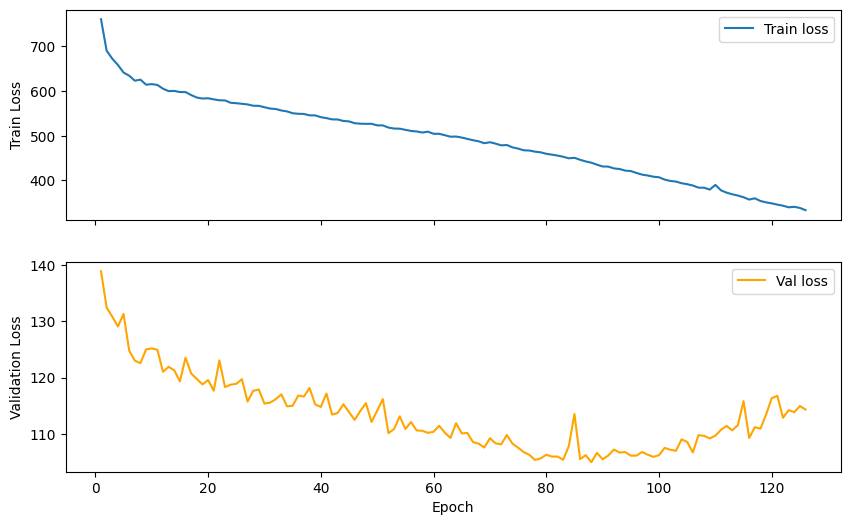

In [ ]:
import pandas as pd
df = pd.read_csv("log_output.csv")
train_loss_list = df["train_loss"].tolist()
val_loss_list = df["val_loss"].tolist()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax1.plot(df["epoch"].tolist(), train_loss_list, label="Train loss")
ax1.legend()
ax1.set_ylabel("Train Loss")
ax2.plot(df["epoch"].tolist(), val_loss_list, label="Val loss",color="orange")
ax2.legend()
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epoch")
plt.show()


## 3. Visualize the attention map

In [ ]:
model = net
checkpoint = torch.load("weights/ViT_109.pth")
checkpoint_model = checkpoint['model_state_dict']
model.load_state_dict(checkpoint_model)
attention_weight_list = []
print(f"The number of encoder layer: {len(model.encoder_layer)}")

The number of encoder layer: 12


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.6611518].


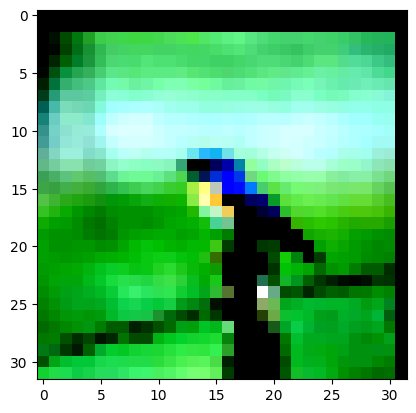

In [ ]:
images = next(iter(train_dataloader))[0]
image = images[0]
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [ ]:
## To extract the attention weight, the image size must be 1*3*32x32
image_reshaped = image.reshape(1, 3, 32, 32)

In [ ]:
def extract_attention_weight(model, target, inputs):
    feature = None
    def forward_hook(module, inputs, output):
        global blocks
        blocks = output.detach()
    handle = target.register_forward_hook(forward_hook)
    model.eval()
    model.to("cpu")
    with torch.no_grad():
        model(inputs)
    handle.remove()
    return blocks

In [ ]:
import numpy as np
import torch.nn.functional as F
import cv2
input_layer = model.input_layer
attention_weight_list = []
features = extract_attention_weight(model, input_layer, image_reshaped)
features.to("cpu").detach().numpy().copy()
z = features
for encoder_block in net.encoder_layer:
    att_layer = encoder_block.multi_head_attention
    batch_size, num_patch,_ = z.shape
    num_heads = att_layer.num_heads # num_heads = 3
    q = att_layer.W_q(z) ## (batch_size, num_patches + 1, embedding_dim)
    k = att_layer.W_k(z) ## (batch_size, num_patches + 1, embedding_dim)
    v = att_layer.W_v(z) ## (batch_size, num_patches + 1, embedding_dim)
    q = q.view(batch_size, num_patch, num_heads, att_layer.head_dim)
    k = k.view(batch_size, num_patch, num_heads, att_layer.head_dim)
    v = v.view(batch_size, num_patch, num_heads, att_layer.head_dim)
    q = q.transpose(1, 2)
    k = k.transpose(1, 2)
    v = v.transpose(1, 2)
    k_T = k.transpose(2, 3)
    dot_k_q = (q@k_T)/att_layer.sqrt_dh
    ### headで分かれている
    attn = F.softmax(dot_k_q, dim=-1)
    attention_weight_list.append([attn.to("cpu").detach().numpy().copy()])
attention_weight = np.squeeze(np.concatenate(attention_weight_list),axis=1)
## Take the average of the attention weight 
attention_weight_mean_head  = np.mean(attention_weight, axis=1)
attention_weight_mean_head.shape
## 単位行列の加算
attention_weight_mean_head = attention_weight_mean_head + np.eye(attention_weight_mean_head.shape[1])
attention_weight_mean_head.shape
## 正規化
attention_weight_mean_head = attention_weight_mean_head / attention_weight_mean_head.sum(axis=(1,2))[:,np.newaxis,np.newaxis]
attention_weight_mean_head.shape
## 層方向に乗算
v = attention_weight_mean_head[-1]
for n in range(1,len(attention_weight_mean_head)):
    ## 逆順にかけていく
    v = np.matmul(v,attention_weight_mean_head[-1-n])
v2 = v[0,1:]
initial_shape = int(np.sqrt(v.size))
v_square = v.reshape(initial_shape, initial_shape)
# Desired final shape
final_shape = (14, 14)
v_reshaped = cv2.resize(v_square, final_shape, interpolation=cv2.INTER_LINEAR)

attention_map  = cv2.resize(v_reshaped/v_reshaped.max(), (image.shape[1],image.shape[2]))[...,np.newaxis]



In [ ]:
v2

array([7.00308918e-10, 8.56116959e-10, 1.33703900e-09, 1.11258542e-09])

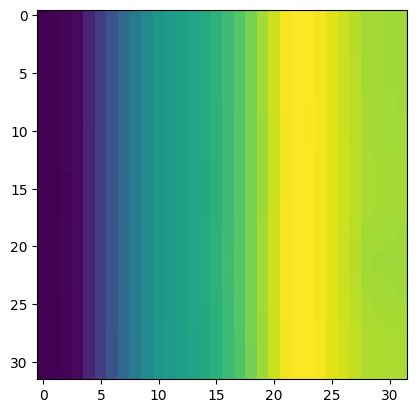

In [ ]:
plt.imshow(attention_map)
plt.show()



In [ ]:
attention_weight_mean_head[-

array([[0.1       , 0.03333333, 0.03333333, 0.03333333, 0.        ],
       [0.        , 0.13333333, 0.03333333, 0.        , 0.03333333],
       [0.03333333, 0.        , 0.16666667, 0.        , 0.        ],
       [0.        , 0.        , 0.03333333, 0.13333333, 0.03333333],
       [0.        , 0.        , 0.        , 0.06666667, 0.13333333]])

In [ ]:
import torch.nn.functional as F
att_layer = net.encoder_layer[0].multi_head_attention
z = features
batch_size, num_patch,_ = z.shape
num_heads = att_layer.num_heads # num_heads = 3
q = att_layer.W_q(z) ## (batch_size, num_patches + 1, embedding_dim)
k = att_layer.W_k(z) ## (batch_size, num_patches + 1, embedding_dim)
v = att_layer.W_v(z) ## (batch_size, num_patches + 1, embedding_dim)
q = q.view(batch_size, num_patch, num_heads, att_layer.head_dim)
k = k.view(batch_size, num_patch, num_heads, att_layer.head_dim)
v = v.view(batch_size, num_patch, num_heads, att_layer.head_dim)
q = q.transpose(1, 2)
k = k.transpose(1, 2)
v = v.transpose(1, 2)
k_T = k.transpose(2, 3)
dot_k_q = (q@k_T)/att_layer.sqrt_dh
### headで分かれている
attn = F.softmax(dot_k_q, dim=-1)

In [ ]:
attn.shape

torch.Size([1, 3, 5, 5])

In [ ]:
features = extract_attention_weight(model, input_layer, image_reshaped)

In [ ]:
features.shape

torch.Size([1, 5, 384])

In [ ]:
ViT_input_Layer

NameError: name 'ViT_input_Layer' is not defined

In [ ]:
##修正版 Attention drop直後の出力を吐き出す
import numpy as np
for i in range(len(model.encoder_layer)):
    encoder_layer = model.encoder_layer[i].multi_head_attention.attn_drop
    ## features.shape = (1, 128, 192, 192)
    features = extract_attention_weight(model, encoder_layer, image_reshaped)
    attention_weight_list.append(features.to("cpu").detach().numpy().copy())
attention_weight = np.squeeze(np.concatenate(attention_weight_list),axis=1)
## Take the average of the attention weight 
attention_weight = np.mean(attention_weight, axis=1)
attention_weight.shape



ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 12 has 3 dimension(s)

In [ ]:
attention_weight_list[0][0].shape

(1, 5, 384)

In [ ]:
# Print the attributes of the encoder_layer
print("Attributes of encoder_layer:")
for attr in dir(model.encoder_layer[i]):
    if not attr.startswith("__") and not attr.endswith("__") and not attr.startswith("_"):
        print(attr)



Attributes of encoder_layer:
T_destination
add_module
apply
bfloat16
buffers
call_super_init
children
compile
cpu
cuda
double
dump_patches
embedding_dim
eval
extra_repr
float
forward
get_buffer
get_extra_state
get_parameter
get_submodule
half
head_dim
ipu
layer_norm_1
layer_norm_2
load_state_dict
mlp
modules
multi_head_attention
named_buffers
named_children
named_modules
named_parameters
num_heads
parameters
register_backward_hook
register_buffer
register_forward_hook
register_forward_pre_hook
register_full_backward_hook
register_full_backward_pre_hook
register_load_state_dict_post_hook
register_module
register_parameter
register_state_dict_pre_hook
requires_grad_
set_extra_state
share_memory
state_dict
to
to_empty
train
training
type
xpu
zero_grad


In [ ]:
import torch
import torch.nn as nn

# モデル定義
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        return x

# モデルのインスタンス化
model = MyModel()

# フックを定義
def get_activation(name):
    def hook(model, input, output):
        print(f"{name} activation: {output.detach()}")
    return hook

# 特定の層にフックを登録
hook = model.conv1.register_forward_hook(get_activation('conv1'))

# データをモデルに通す
input = torch.randn(1, 1, 28, 28)
output = model(input)

# フックを削除（必要があれば）
hook.remove()

conv1 activation: tensor([[[[-0.2152, -0.4564,  0.7076,  ...,  0.2806, -0.3160,  0.2023],
          [-0.0117,  1.1896,  1.7433,  ...,  0.2173,  0.8605,  0.0876],
          [ 0.1147,  1.0799,  0.4437,  ...,  0.9867,  1.0755, -0.5029],
          ...,
          [-0.1860,  0.2035,  0.3674,  ..., -0.5535, -0.3839, -0.2352],
          [-0.6834,  0.2272,  0.6110,  ..., -0.4193,  0.0049, -0.2081],
          [ 0.0539,  1.3260, -0.4813,  ..., -0.0712, -0.0320, -0.8060]],

         [[ 0.1778,  0.0961,  0.2402,  ..., -0.4152, -1.8323, -1.0997],
          [-0.6671, -0.1976, -0.0303,  ...,  0.0638,  0.7930,  0.3436],
          [-0.3045, -0.0695, -0.1761,  ...,  0.4772,  0.7241, -0.2473],
          ...,
          [-0.6782,  0.9323,  0.0678,  ..., -0.5960,  0.0435,  0.5721],
          [ 0.3206,  0.5230, -0.4350,  ...,  0.2159, -0.6651, -0.6206],
          [ 0.3888, -0.0932, -0.5978,  ...,  0.1708,  0.5133,  0.1108]],

         [[ 0.1020, -0.0901,  0.4087,  ..., -0.5742, -0.2523,  0.1049],
          [-

In [ ]:
output

tensor([[[[ 0.0643,  0.1789,  0.4432,  ...,  0.0241,  0.1549,  0.2673],
          [ 0.4949,  0.0820,  0.3630,  ...,  0.0675,  0.1065,  0.0866],
          [ 0.1509,  0.1693,  0.2042,  ...,  0.4384, -0.2137,  0.0733],
          ...,
          [-0.0302, -0.0593,  0.4920,  ..., -0.0094,  0.1352,  0.1130],
          [ 0.2640, -0.0106,  0.2327,  ...,  0.2137, -0.1638,  0.3165],
          [ 0.2224,  0.0083,  0.2344,  ..., -0.0076,  0.3995, -0.0171]],

         [[-0.2313,  0.2140, -0.2553,  ..., -0.0205,  0.3990, -0.1821],
          [-0.1042, -0.1138, -0.3324,  ..., -0.0968, -0.4518, -0.2134],
          [-0.5432,  0.1009, -0.1195,  ...,  0.3098, -0.1122, -0.0801],
          ...,
          [ 0.1596, -0.2391,  0.0100,  ..., -0.0273, -0.0818,  0.4010],
          [-0.1092, -0.2951, -0.0374,  ..., -0.3855,  0.0127,  0.0573],
          [-0.0972,  0.0858, -0.3816,  ...,  0.0057,  0.0312, -0.1901]],

         [[ 0.0971,  0.3713, -0.3138,  ...,  0.3033,  0.6224,  0.3292],
          [-0.1690,  0.0247,  